# 投資用不動産データの分析
"Rakumachi_scraping"にて2017年11月13日と2018年3月10日にそれぞれ取得したデータの可視化及び比較を行う

In [1]:
#ライブラリおよびCSVファイルの読み込み
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

from PIL import Image

df_loaded_Mar = pd.read_csv("20180310rakumachi.csv")
df_loaded_Nov = pd.read_csv("20171113rakumachi.csv")

住所から市区を切り出しローマ字表記にする関数を定義する。路線は表記のばらつきがあるため保留

In [3]:
def modify_rakumachi (df):
    
    df = df.dropna() #抜けのあるデータはひとまず削除
    df = df[df['専有面積（平米）'] > 6] #狭すぎる部屋は入力ミスの可能性あり
    df = df[df['専有面積（平米）'] < 200] #広すぎる部屋は入力ミスの可能性あり
    
    df.index = range(len(df))
    
    walk = df['徒歩（分）']
    built_yr = df['築年']
    built_mo = df['築月']
    layout = df['間取り']
    gross_yield = df['表面利回り']
    price  = df['価格（千円）']
    room_area = df['専有面積（平米）']
    structure = df['造り']
    
    #住所を市区（ward）、町（town）で分ける
    #df['住所'][1].split('区')[0].split('都')

    ward_list = []
    town_list = []
    for i in range(len(df)):
            if df['物件名'][i] !='会員用専用':
                add_dum = df['住所'][i].split('都')[1].split('区')
                if len(add_dum) == 2:
                    ward_list.append(add_dum[0])
                    town_list.append(add_dum[1])
                else:
                    add_dum = df['住所'][i].split('都')[1].split('市')
                    if len(add_dum) == 2:
                        ward_list.append(add_dum[0])
                        town_list.append(add_dum[1])
                    else:
                        ward_list.append('na')
                        town_list.append('na')
            else:
                ward_list.append('na')
                town_list.append('na')

    ward = pd.Series(ward_list)
    town = pd.Series(town_list)
    
    #路線と駅を分離する。が、路線は表記の仕方にばらつきがあり要改良
    
    line_list = []
    for i in range(len(df)):
        line_list.append(df['路線'][i].split('線')[0].split()[0])
    line = pd.Series(line_list)

    station_list = []
    for i in range(len(df)):
        station_list.append(df['最寄り駅'][i].split('駅')[0])  
    station = pd.Series(station_list)
    
    price_area = price / room_area 
    
    df_1 = pd.concat([price, gross_yield, price_area, ward,town,line,station,walk,built_yr,built_mo,layout,room_area,structure],axis=1)
    df_1.columns = ['price', 'gross_yield', 'price_per_area','ward','town','line','station','walk','built_yr','built_mo','layout','room_area','structure']
    
    df_2 =  df_1[df['物件名']!='会員用専用'] #会員専用情報は用いない
    
    
    
    ward_dict = {'八王子':'Hachioji', '目黒':'Meguro', '豊島':'Toshima', '渋谷':'Shibuya', '練馬':'Nerima',
             '新宿':'Shinjuku', '調布':'Chofu', '板橋':'Itabashi', '府中':'Fuchu', '中野':'Nakano',
             '北':'Kita','大田':'Ota', '世田谷':'Setagaya', '小金井':'Koganei', '杉並':'Suginami',
             '葛飾':'Katsushika', '中央':'Chuo', '三鷹':'Mitaka', '台東':'Taito', '品川':'Shinagawa',
             '墨田':'Sumida', '港':'Minato','江東':'Koto', '足立':'Adachi', '文京':'Bunkyo', '荒川':'Arakawa',
             '清瀬':'Kiyose', '千代田':'Chiyoda', '町田':'Machida', '多摩':'Tama', '国分寺':'Kokubunji',
             '福生':'Fussa', '東大和':'Higasiyamato', '武蔵野':'Musashino', '小平':'Kodaira', '狛江':'Komae',
             '立川':'Tachikawa', '稲城':'Inagi', '西東京':'Nishitokyo', '国立':'Kunitachi', '江戸川':'Edogawa',
             '青梅':'Oume','東久留米':'Higashikurume', 'na':'NA', '日野':'Hino', '羽村':'Hamura', '東村山':'Higashimurayama',
             '武蔵村山':'Musashimurayama', '昭島':'Akishima', 'あきる野':'Akiruno'}

    #ローマ字表記の方が詰め込まれても見やすい
    ward_series = df_1['ward']
    ward_e_list = []
    for w in ward_series:
        ward_e_list.append(ward_dict[w])
    wards_e = pd.Series(ward_e_list)
    wards_e.index = ward_series.index

    del df_2['ward']
    
    df_3 = pd.concat([df_2,wards_e], axis=1)
    df_3.columns =  ['price', 'gross_yield', 'price_per_area','town','line',
                   'station','walk','built_yr','built_mo','layout','room_area','structure', 'ward']

    
    return df_3

データを23区に限定する関数

In [ ]:
def ward23 (df):
    df_23_ward = df[(df['ward']=='Meguro') | (df['ward']=='Toshima') | (df['ward']=='Shinjuku') |(df['ward']=='Nerima') | (df['ward']=='Shibuya') |
              (df['ward']=='Itabashi') | (df['ward']=='Nakano') | (df['ward']=='Kita') | (df['ward']=='Ota') | (df['ward']=='Setagaya') |
              (df['ward']=='Suginami') | (df['ward']=='Katsushika') | (df['ward']=='Chuo') |(df['ward']=='Taito') | (df['ward']=='Shinagawa') |
              (df['ward']=='Sumida') | (df['ward']=='Minato') | (df['ward']=='Koto') | (df['ward']=='Adachi') | (df['ward']=='Bunkyo') |
              (df['ward']=='Arakawa') | (df['ward']=='Chiyoda') | (df['ward']=='Edogawa')]

    return df_23_ward

上のmodify_rakumachi を適用した後、区ごとの平均・分散を一括で求める関数

In [9]:
def groupby_ward(df): 
    wards = df['ward'].unique()

    cnt = []
    area_price_means = []
    area_price_stds = []
    yield_means = []
    yield_stds = []

    for w in wards:

        a_mean = (df[df['ward']==w]['price']/df[df['ward']==w]['room_area']).mean()
        a_std = (df[df['ward']==w]['price']/df[df['ward']==w]['room_area']).std()
        y_mean = df[(df['ward']==w) & (df['gross_yield']!=0)]['gross_yield'].mean()
        y_std = df[(df['ward']==w) & (df['gross_yield']!=0)]['gross_yield'].std()
        cnt.append(df['ward'].value_counts()[w])
        area_price_means.append(a_mean)
        area_price_stds.append(a_std)
        yield_means.append(y_mean)
        yield_stds.append(y_std)


    count = pd.Series(cnt)
    ap_mean_series = pd.Series(area_price_means)
    ap_std_series = pd.Series(area_price_stds)
    y_mean_series = pd.Series(yield_means)
    y_std_series = pd.Series(yield_stds)


    wards_series = pd.Series(wards)

    df_ward = pd.concat([wards_series, count,ap_mean_series,ap_std_series, y_mean_series,y_std_series],axis=1)
    df_ward.columns = ['ward', 'count','area_price_mean','area_price_std','yield_mean','yield_std']
    df_ward.index = wards
    return df_ward

2017年11月と2018年3月のそれぞれのデータを定義した関数に代入する

In [6]:
df_Mar = modify_rakumachi(df_loaded_Mar)
df_Mar_ward23 = ward23 (df_Mar)
df_ward_Mar = groupby_ward(df_Mar_ward23)

df_Nov = modify_rakumachi(df_loaded_Nov)
df_Nov_ward23 = ward23 (df_Nov)
df_ward_Nov = groupby_ward(df_Nov_ward23)

In [7]:
#平米単価平均が11月と３月で異なっているといえるかどうかをｔ検定で確認する
nov = np.array(df_Nov_ward23['price_per_area'])
mar = np.array(df_Mar_ward23['price_per_area'])
    
scipy.stats.ttest_ind(nov,mar,equal_var=False)

Ttest_indResult(statistic=-2.09045624447475, pvalue=0.03658827529857061)

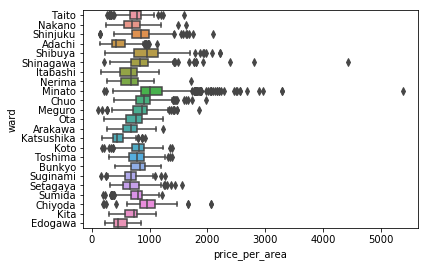

In [8]:
#２３区ごとの平米単価の分布をboxプロットで確認
sns.boxplot(x=df_Mar_ward23['price_per_area'], y=df_Mar_ward23['ward'])

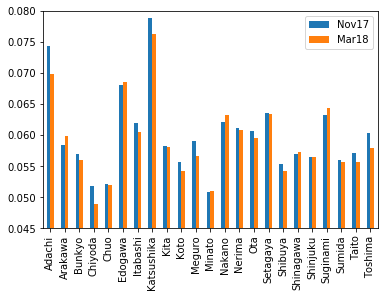

In [9]:
#各区における平均表面利回りの変化
df_mean_yield = pd.concat([df_ward_Nov['yield_mean'],df_ward_Mar['yield_mean']],axis=1)
df_mean_yield.columns = ['Nov17','Mar18']
df_mean_yield.plot(kind='bar',ylim=(0.045,0.08))

In [10]:
#平均利回りが低下しているか（平均の比較）
df_mean_yield['Nov17'] > df_mean_yield['Mar18']

Adachi         True
Arakawa       False
Bunkyo         True
Chiyoda        True
Chuo           True
Edogawa       False
Itabashi       True
Katsushika     True
Kita           True
Koto           True
Meguro         True
Minato        False
Nakano        False
Nerima         True
Ota            True
Setagaya       True
Shibuya        True
Shinagawa     False
Shinjuku       True
Suginami      False
Sumida         True
Taito          True
Toshima        True
dtype: bool

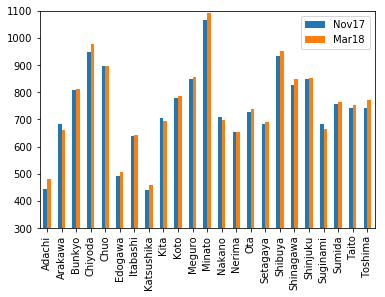

In [11]:
#各区における平米単価（千円）の変化
df_mean_price = pd.concat([df_ward_Nov['area_price_mean'],df_ward_Mar['area_price_mean']],axis=1)
df_mean_price.columns = ['Nov17','Mar18']
df_mean_price.plot(kind='bar',ylim=(300,1100))

In [12]:
#平米単価が上昇しているか（平均の比較）
df_mean_price['Nov17'] < df_mean_price['Mar18']

Adachi         True
Arakawa       False
Bunkyo         True
Chiyoda        True
Chuo           True
Edogawa        True
Itabashi       True
Katsushika     True
Kita          False
Koto           True
Meguro         True
Minato         True
Nakano        False
Nerima         True
Ota            True
Setagaya       True
Shibuya        True
Shinagawa      True
Shinjuku       True
Suginami      False
Sumida         True
Taito          True
Toshima        True
dtype: bool

In [13]:
wards = df_Nov_ward23['ward'].unique()

p_value_list = []

for w in wards:

    nov = np.array(df_Nov_ward23[df_Nov_ward23['ward']==w]['price_per_area'])
    mar = np.array(df_Mar_ward23[df_Mar_ward23['ward']==w]['price_per_area'])
    
    p_value_list.append(scipy.stats.ttest_ind(nov,mar,equal_var=False)[1])


In [14]:
T_or_F = pd.Series(np.array(p_value_list) < 0.1, index=wards)
T_or_F

Meguro        False
Toshima        True
Shibuya       False
Shinjuku      False
Kita          False
Ota           False
Setagaya      False
Suginami       True
Katsushika    False
Itabashi      False
Nakano        False
Taito         False
Sumida        False
Minato        False
Koto          False
Bunkyo        False
Arakawa       False
Chiyoda       False
Chuo          False
Shinagawa     False
Nerima        False
Adachi         True
Edogawa       False
dtype: bool

平均の単純比較では平均単価が上昇しているようなのでｔ検定で確認した
有意水準10%でｔ検定を行ったところ、有意に平均が変化している区は限られていることがわかった
予想に反してFalseが多いのは、平米単価のばらつきが大きくt値が大きくなりにくいためだと考えられる

# 区ごとの情報を色分けで可視化する

Pythonのみで白地図を塗り分けるのは断念し、https://n.freemap.jp/ にて可視化した地図を作成しpngに保存した

次の関数はデータを7つに区分してフラグを立てるものである。数字ごとに色を割り当て上記サイトにて手動で塗分けていった

In [51]:
df_ward = groupby_ward(df_Mar)

arr = np.array(df_ward['area_price_mean'])
arr_min = arr.min()
arr_max = arr.max()

color_list = []

color_codes = range(7)

diff = (arr_max - arr_min) / 5

for i in range(len(arr)):
    if arr[i]==arr_max:
        color_list.append(color_codes[0])
    elif (arr_max > arr[i]) & (arr[i] >= arr_max - diff * 1):
        color_list.append(color_codes[1])
    elif (arr_max - diff * 1 > arr[i]) & (arr[i] >= arr_max - diff * 2):
        color_list.append(color_codes[2])
    elif (arr_max - diff * 2 > arr[i]) & (arr[i] > arr_max - diff * 3):
        color_list.append(color_codes[3])
    elif (arr_max - diff * 3 > arr[i]) & (arr[i] > arr_max - diff * 4):
        color_list.append(color_codes[4])
    elif (arr_max - diff * 4 > arr[i]) & (arr[i] > arr_max - diff * 5):
        color_list.append(color_codes[5])
    elif arr[i]==arr_min:
        color_list.append(color_codes[6])

color_series = pd.Series(color_list, index=df_ward['ward'])

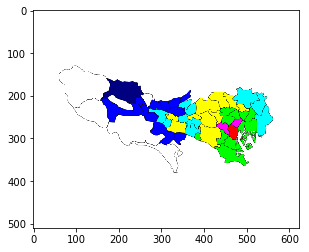

In [18]:
# 平均平米単価の高い順から赤、赤紫、黄緑、黄色、水色、青色、紺色というように塗り分けた
im = Image.open("Tokyo.png", "r")
plt.imshow(np.array(im))

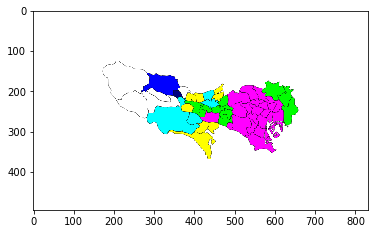

In [21]:
# 平均表面利回りの低い順から赤、赤紫、黄緑、黄色、水色、青色、紺色というように塗り分けた
im = Image.open("Tokyo_yield.png", "r")
plt.imshow(np.array(im))

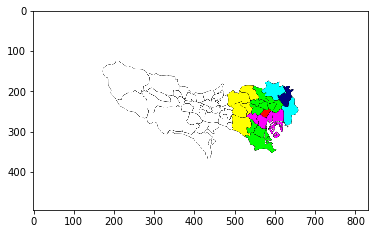

In [54]:
# 23区に限定して表面利回りを区分した
im = Image.open("Tokyo23_yield.png", "r")
plt.imshow(np.array(im))